<a href="https://colab.research.google.com/github/RedaRafi/Breast-Cancer-Detection-/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer detection Using TensorFlow 




We are going to use tensorflow 2.3 to build the model. 

In [ ]:
 !pip install tensorflow-gpu==2.3.0-rc0

     |████████████████████████████████| 320.3MB 46kB/s 
     |████████████████████████████████| 460kB 39.9MB/s 
     |████████████████████████████████| 3.0MB 45.4MB/s 
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 2.2.2 which is incompatible.
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0



#Importing necessary library that will use in model building.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

from tensorflow.keras.optimizers import Adam




2.3.0


In [ ]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
import pandas.util.testing as tm

In [ ]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# *Loading the breast cancer classification dataset.*

In [ ]:
cancer = datasets.load_breast_cancer()


*   Pandas DataFrame to present all My data. 
*   Create a dataframe with our cancer data and target data.





In [ ]:
X = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)
X.head() 



array(['malignant', 'benign'], dtype='<U9')

In [ ]:
y = cancer.target
cancer.target_names
X.shape

# split the dataset in a random manner.
*using SciKit library*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X_train.shape


(455, 30)

In [ ]:
X_test.shape

(114, 30)

*removes the mean and scales the data to unit variance.*

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
X_train = X_train.reshape(455,30,1)
X_test = X_test.reshape(114, 30, 1)

# Building Model 


In [ ]:
epochs = 50
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape = (30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_4 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_7 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1792)             

In [ ]:
model.compile(optimizer=Adam(lr=0.00005), loss = 'binary_crossentropy', metrics=['accuracy'])

*Trains the model for a fixed number of epochs (iterations on a dataset).*

In [ ]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
15/15 [==============================] - 0s 23ms/step - loss: 0.8295 - accuracy: 0.6484 - val_loss: 0.6291 - val_accuracy: 0.8070
Epoch 2/50
15/15 [==============================] - 0s 9ms/step - loss: 0.6509 - accuracy: 0.7429 - val_loss: 0.5924 - val_accuracy: 0.8333
Epoch 3/50
15/15 [==============================] - 0s 8ms/step - loss: 0.5260 - accuracy: 0.7868 - val_loss: 0.5577 - val_accuracy: 0.8509
Epoch 4/50
15/15 [==============================] - 0s 9ms/step - loss: 0.4249 - accuracy: 0.8308 - val_loss: 0.5255 - val_accuracy: 0.8684
Epoch 5/50
15/15 [==============================] - 0s 8ms/step - loss: 0.3787 - accuracy: 0.8418 - val_loss: 0.4947 - val_accuracy: 0.8684
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 0.3497 - accuracy: 0.8527 - val_loss: 0.4658 - val_accuracy: 0.8596
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 0.3395 - accuracy: 0.8659 - val_loss: 0.4398 - val_accuracy: 0.8509
Epoch 8/50
15/15 [=

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

In [ ]:
history.history

{'accuracy': [0.6483516693115234,
  0.7428571581840515,
  0.7868131995201111,
  0.8307692408561707,
  0.8417582511901855,
  0.8527472615242004,
  0.8659340739250183,
  0.8857142925262451,
  0.8879120945930481,
  0.894505500793457,
  0.894505500793457,
  0.9098901152610779,
  0.898901104927063,
  0.9164835214614868,
  0.9186813235282898,
  0.9384615421295166,
  0.9186813235282898,
  0.9252747297286987,
  0.9164835214614868,
  0.9494505524635315,
  0.9450549483299255,
  0.9208791255950928,
  0.9296703338623047,
  0.9296703338623047,
  0.9494505524635315,
  0.9560439586639404,
  0.9384615421295166,
  0.9472527503967285,
  0.9362637400627136,
  0.9472527503967285,
  0.9494505524635315,
  0.9428571462631226,
  0.9538461565971375,
  0.9472527503967285,
  0.9538461565971375,
  0.9604395627975464,
  0.9582417607307434,
  0.9538461565971375,
  0.9560439586639404,
  0.9516483545303345,
  0.9648351669311523,
  0.9648351669311523,
  0.9538461565971375,
  0.9582417607307434,
  0.9560439586639404,
 

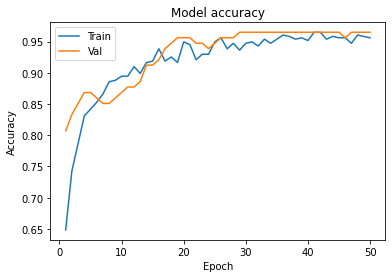

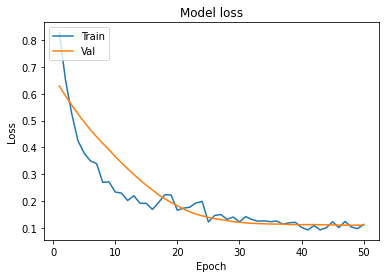

In [ ]:
plot_learningCurve(history, epochs)